In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [51]:
data = pd.read_csv('/content/HousingData.csv')

In [52]:
X = data.drop('MEDV',axis=1)

In [53]:
y = data['MEDV']

In [54]:
model = KNeighborsRegressor()

In [55]:
X.fillna(0,inplace=True)

In [56]:
model.fit(X,y)

KNeighborsRegressor()

In [57]:
pred = model.predict(X)

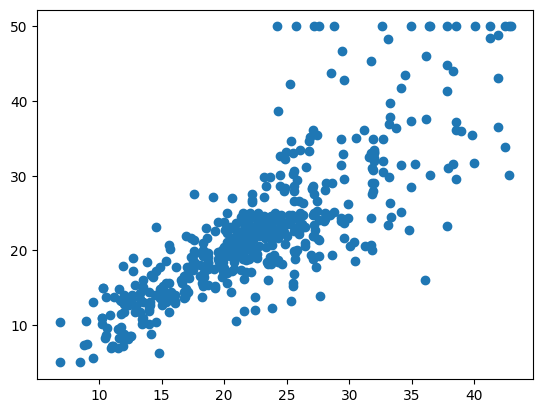

In [58]:
plt.scatter(pred,y)

In [59]:
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('model',KNeighborsRegressor(n_neighbors=3))
])

In [60]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=3))])

In [61]:
pred = pipe.predict(X)

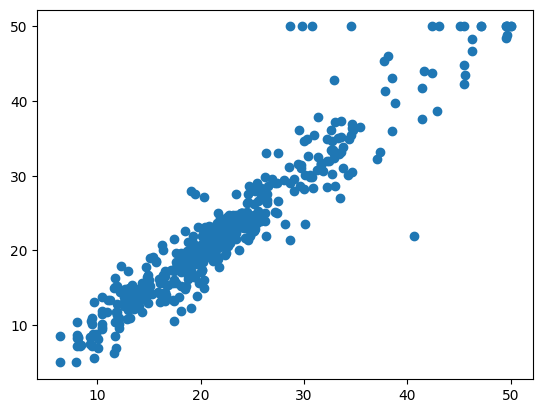

In [62]:
plt.scatter(pred,y)

In [63]:
mod = GridSearchCV(estimator = pipe, param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9]},cv=3)

In [64]:
mod.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=3))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [65]:
pred=mod.predict(X)

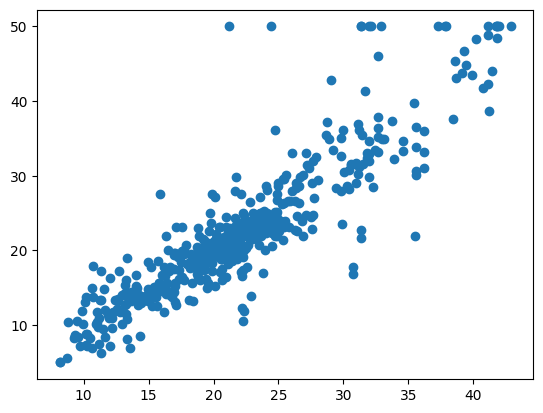

In [66]:
plt.scatter(pred,y)

In [67]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004686,0.000667,0.003735,0.000308,1,{'model__n_neighbors': 1},0.281197,0.451193,0.119869,0.284086,0.135278,9
1,0.004462,0.000066,0.004356,0.000372,2,{'model__n_neighbors': 2},0.383915,0.432160,0.177550,0.331208,0.110424,8
2,0.004071,0.000094,0.003621,0.000084,3,{'model__n_neighbors': 3},0.464829,0.455385,0.248579,0.389598,0.099790,5
3,0.003889,0.000036,0.003633,0.000088,4,{'model__n_neighbors': 4},0.526602,0.376987,0.220740,0.374776,0.124878,7
4,0.004779,0.000889,0.004095,0.000641,5,{'model__n_neighbors': 5},0.564778,0.371945,0.208308,0.381677,0.145691,6
5,0.004212,0.000153,0.003794,0.000086,6,{'model__n_neighbors': 6},0.574511,0.403042,0.196057,0.391204,0.154730,4
6,0.004117,0.000156,0.003907,0.000179,7,{'model__n_neighbors': 7},0.578755,0.427526,0.198040,0.401440,0.156517,2
7,0.004232,0.000272,0.003961,0.000157,8,{'model__n_neighbors': 8},0.596481,0.438011,0.188295,0.407596,0.168023,1
8,0.006601,0.000476,0.005882,0.000497,9,{'model__n_neighbors': 9},0.608044,0.416269,0.161856,0.395390,0.182752,3


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [69]:
data = pd.read_csv('/content/drawndata1.csv')

In [70]:
X = data[['x','y']].values
Y = data['z'] == 'a'

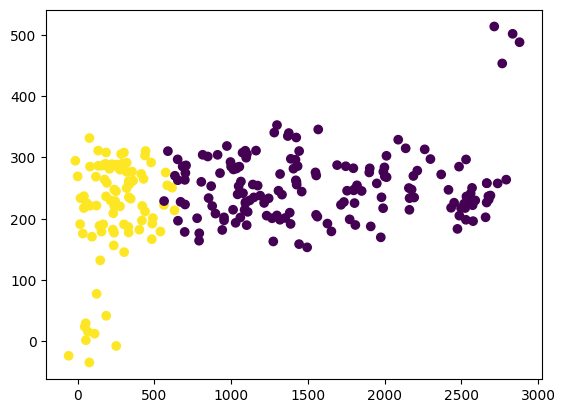

In [71]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [72]:
scale = StandardScaler()
X = scale.fit_transform(X)

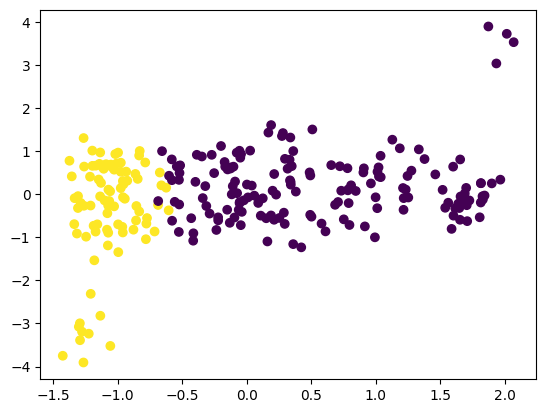

In [73]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [74]:
quantile = QuantileTransformer(n_quantiles=200)
X = quantile.fit_transform(X)

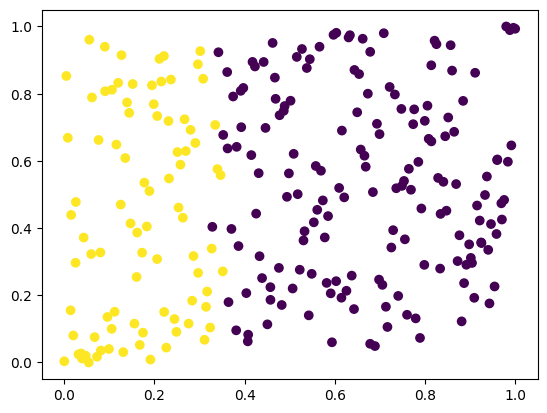

In [75]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [76]:
import numpy as np
import nltk
import pandas as pd
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [111]:
df = pd.DataFrame({'Reviews':["Movie was awesome","Not as good as expected",
                              "It was an amazing movie","I think it is too much hyped",
                              "Good value for money"],'Sentimet':[1,0,1,0,1]})
df.head()

,Reviews,Sentimet
0,Movie was awesome,1
1,Not as good as expected,0
2,It was an amazing movie,1
3,I think it is too much hyped,0
4,Good value for money,1


In [112]:
import string
def text_cleaning(text):
  text = text.lower()
  text = ''.join(char for char in text if char not in string.punctuation)
  return text

In [113]:
df['Reviews'] = df['Reviews'].apply(lambda x : text_cleaning(x))

In [114]:
df['Reviews']

,Reviews
0,movie was awesome
1,not as good as expected
2,it was an amazing movie
3,i think it is too much hyped
4,good value for money


In [115]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [116]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [117]:
def stem(text):
  return ' '.join(stemmer.stem(word) for word in text.split())
def lemmatize(text):
  return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

In [107]:
df['Reviews'] = df['Reviews'].apply(lambda x: stem(x))

In [108]:
df['Reviews']

,Reviews
0,movi wa awesom
1,not as good as expect
2,it wa an amaz movi
3,i think it is too much hype
4,good valu for money


In [118]:
df['Reviews'] = df['Reviews'].apply(lambda x: lemmatize(x))

In [119]:
df['Reviews']

,Reviews
0,movie wa awesome
1,not a good a expected
2,it wa an amazing movie
3,i think it is too much hyped
4,good value for money


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test = train_test_split(df['Reviews'],df['Sentimet'],test_size=0.4,random_state=42)

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [124]:
pipr = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])
pipr.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [130]:
X_test

,Reviews
1,not a good a expected
4,good value for money


In [129]:
pipr.predict(X_test)

array([1, 1])